## Gdown

In [13]:
!pip install gdown
!gdown 10Xe2S26C4K2eHG1gKDktJD-Z33InILXL

Downloading...
From: https://drive.google.com/uc?id=10Xe2S26C4K2eHG1gKDktJD-Z33InILXL
To: /content/teleCust1000t.csv
100% 37.0k/37.0k [00:00<00:00, 56.5MB/s]


## Import Data

In [14]:
import pandas as pd

df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


## Correlation

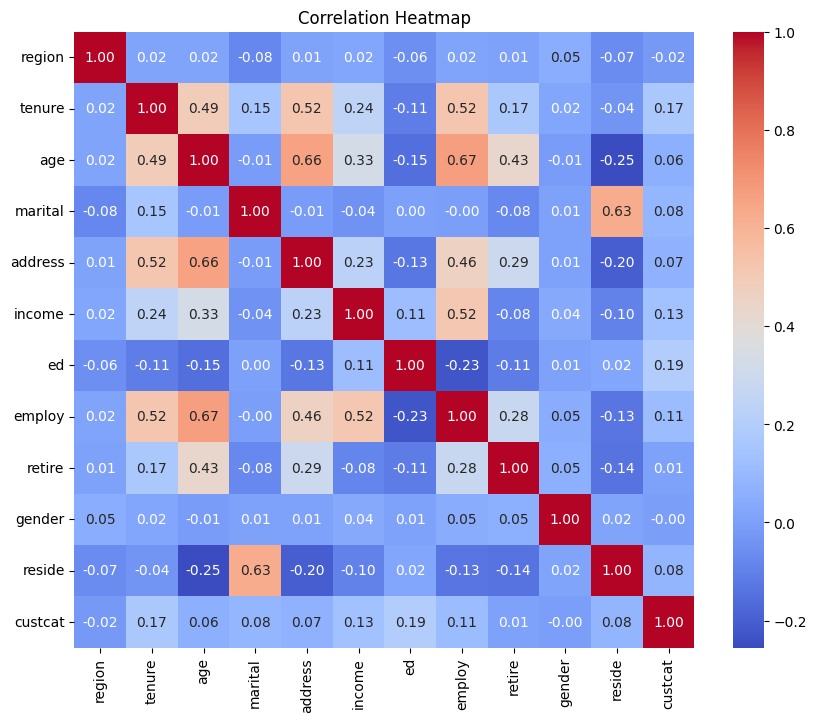

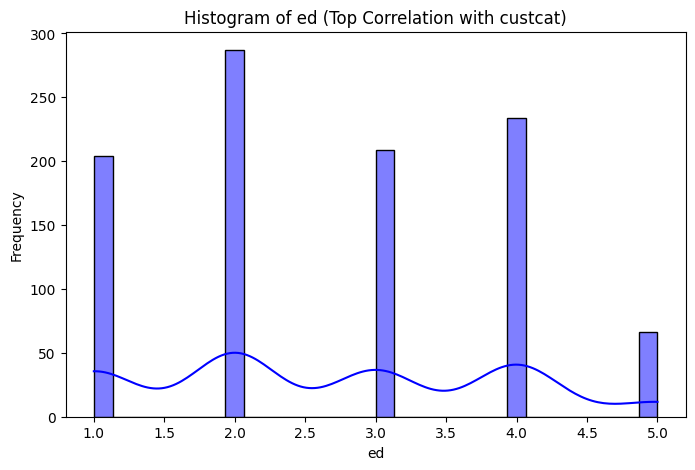

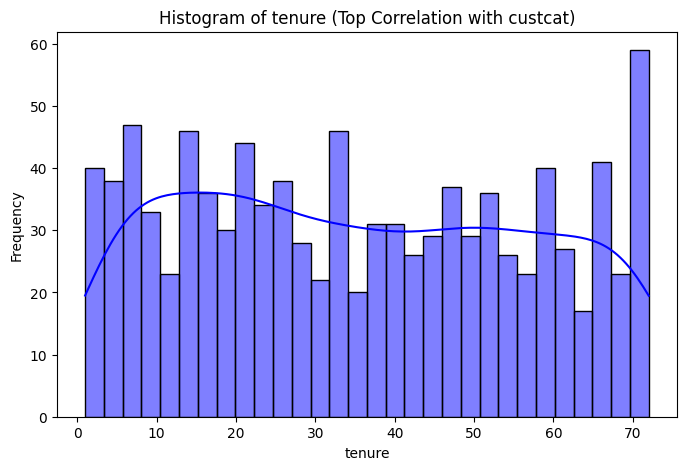

['ed', 'tenure']

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# Identify the two features with the highest correlation with the target field 'custcat'
target_correlation = correlation_matrix['custcat'].drop('custcat')
top_two_features = target_correlation.abs().nlargest(2).index.tolist()

# Plot histograms for the two most correlated features
for feature in top_two_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f"Histogram of {feature} (Top Correlation with custcat)")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

top_two_features

## Split & Normalization

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df.drop(columns=['custcat'])
y = df['custcat']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=93)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.75, random_state=93)

split_summary = {
    "Training set": X_train.shape[0],
    "Validation set": X_val.shape[0],
    "Test set": X_test.shape[0]
}

split_summary

{'Training set': 800, 'Validation set': 50, 'Test set': 150}

In [18]:
pip install tensorflow

## Different No. of Neurons

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


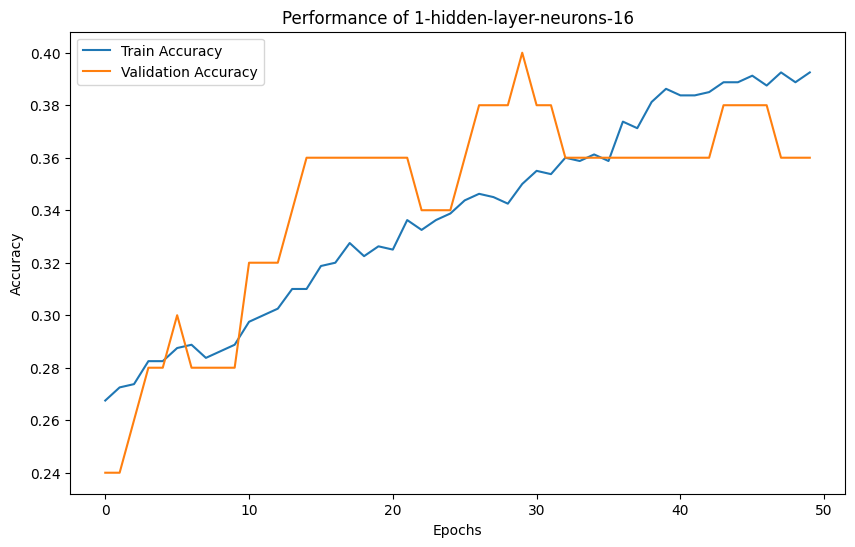

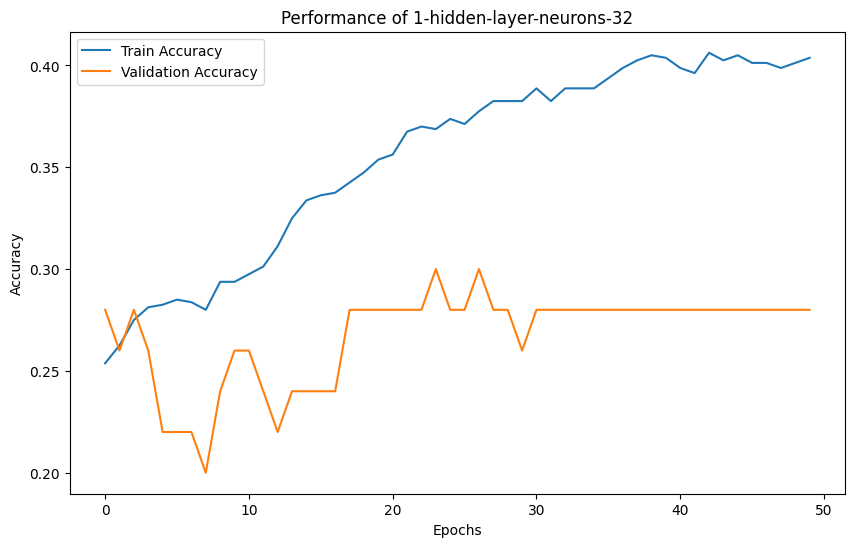

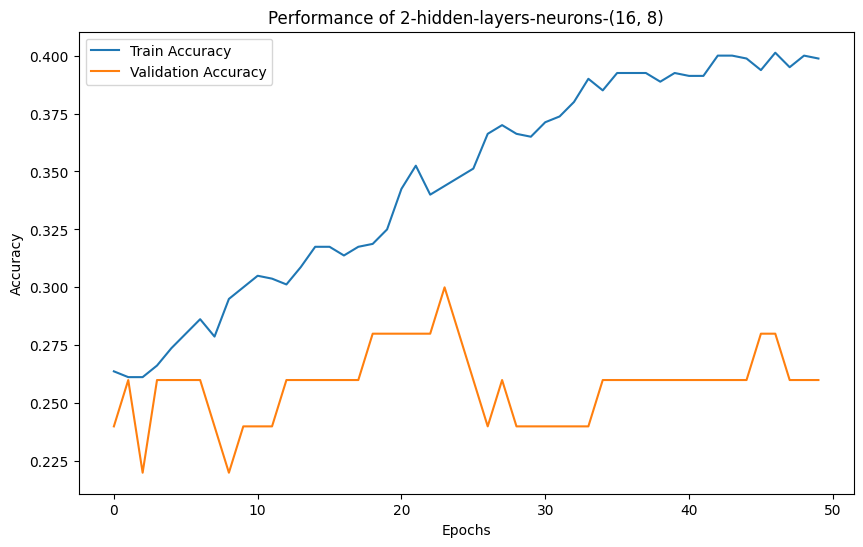

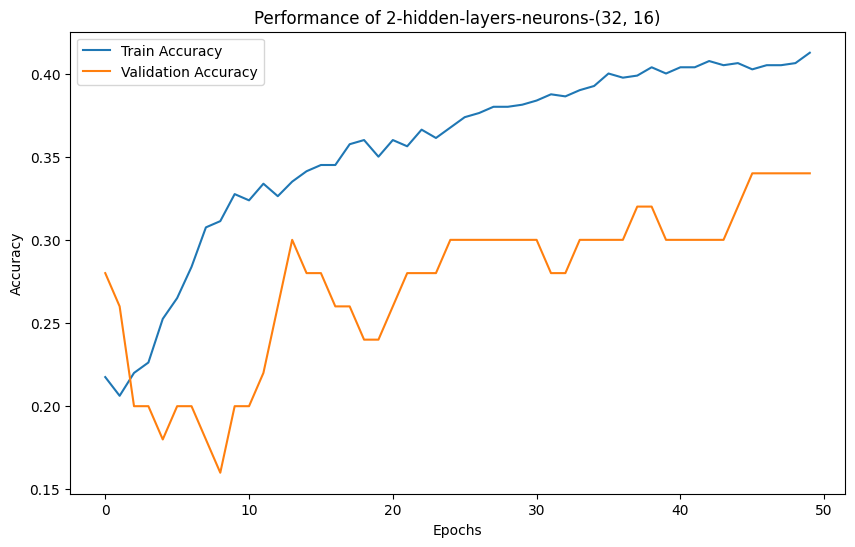

MLP Accuracy Comparison:


,Model,Validation Accuracy
0,1-hidden-layer-neurons-16,0.36
1,"2-hidden-layers-neurons-(32, 16)",0.34
2,1-hidden-layer-neurons-32,0.28
3,"2-hidden-layers-neurons-(16, 8)",0.26


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Adjust target labels to be in the range [0, 3]
y_train_adjusted = y_train - 1
y_val_adjusted = y_val - 1
y_test_adjusted = y_test - 1

# One hidden layer
def create_model_one_hidden_layer(neurons):
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Two hidden layers
def create_model_two_hidden_layers(neurons_1, neurons_2):
    model = Sequential([
        Dense(neurons_1, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(neurons_2, activation='relu'),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

results = {}
configs = [
    {"type": "1-hidden-layer", "neurons": [16, 32]},
    {"type": "2-hidden-layers", "neurons": [(16, 8), (32, 16)]}
]

for config in configs:
    for neuron_config in config["neurons"]:
        if config["type"] == "1-hidden-layer":
            model = create_model_one_hidden_layer(neuron_config)
        else:
            model = create_model_two_hidden_layers(*neuron_config)

        history = model.fit(
            X_train, y_train_adjusted,
            validation_data=(X_val, y_val_adjusted),
            epochs=50, batch_size=32, verbose=0
        )

        key = f"{config['type']}-neurons-{neuron_config}"
        results[key] = history

# Plot the results
for key, history in results.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Performance of {key}")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

accuracy_comparison = []

for key, history in results.items():
    final_val_accuracy = history.history["val_accuracy"][-1]  # Last epoch's validation accuracy
    accuracy_comparison.append((key, final_val_accuracy))

accuracy_comparison = sorted(accuracy_comparison, key=lambda x: x[1], reverse=True)

accuracy_comparison_df = pd.DataFrame(accuracy_comparison, columns=["Model", "Validation Accuracy"])

from IPython.display import display
print("MLP Accuracy Comparison:")
display(accuracy_comparison_df)

## BatchNormalization

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


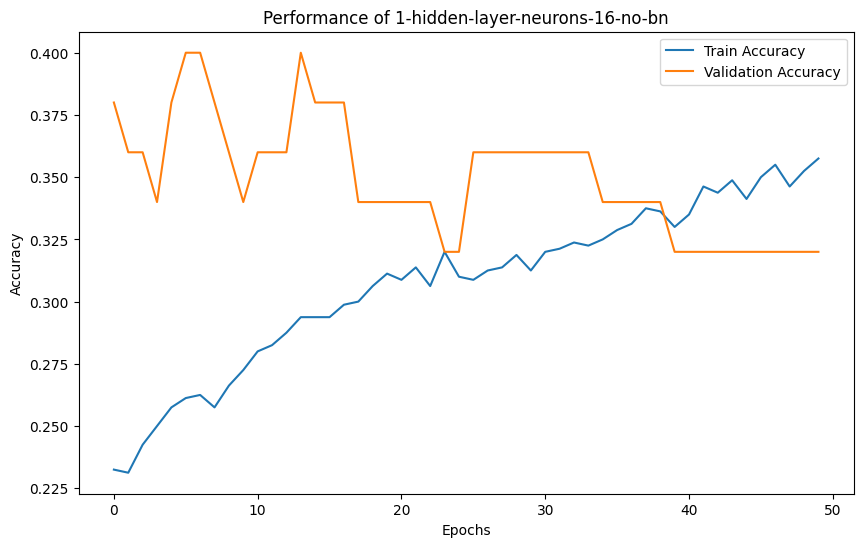

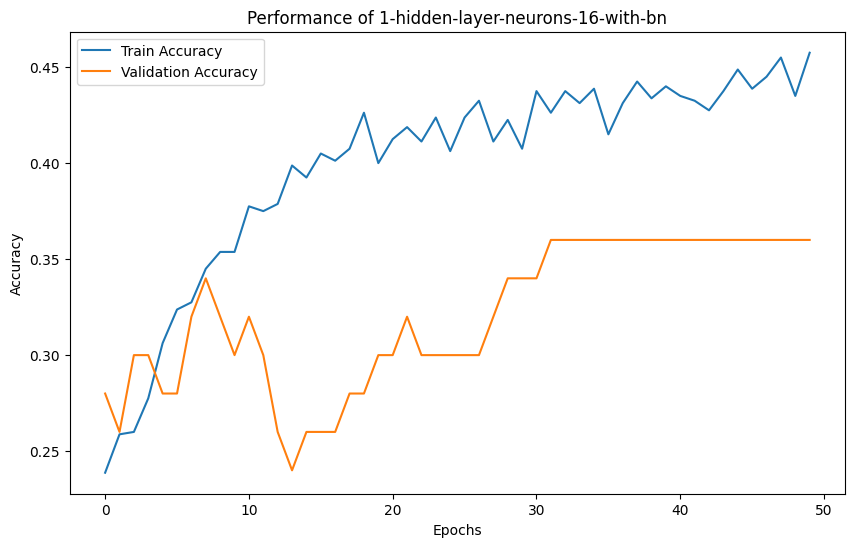

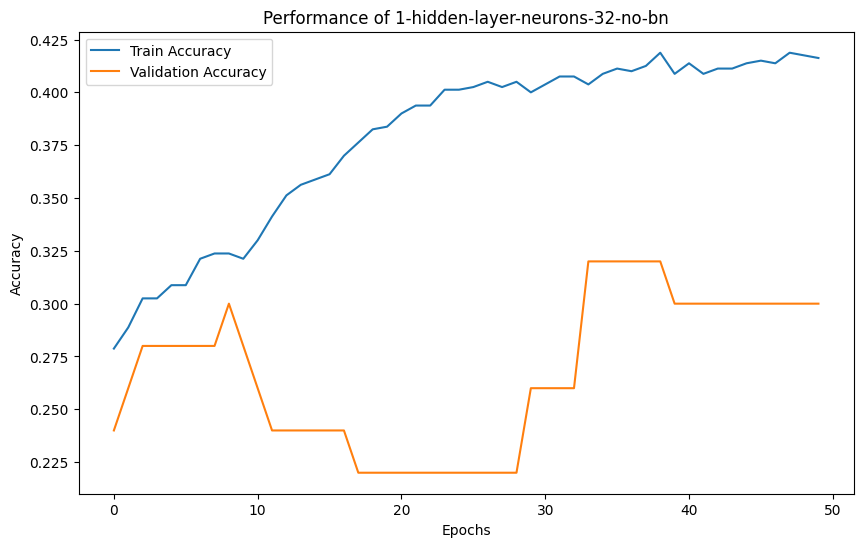

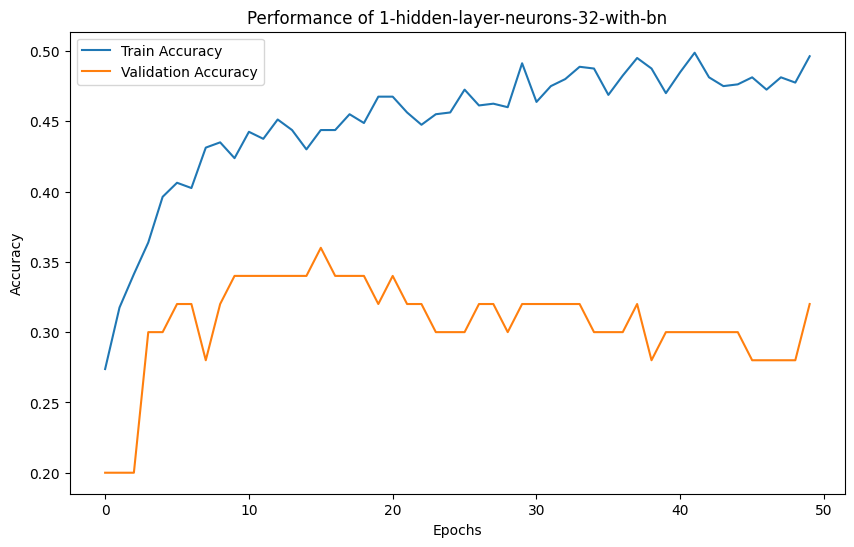

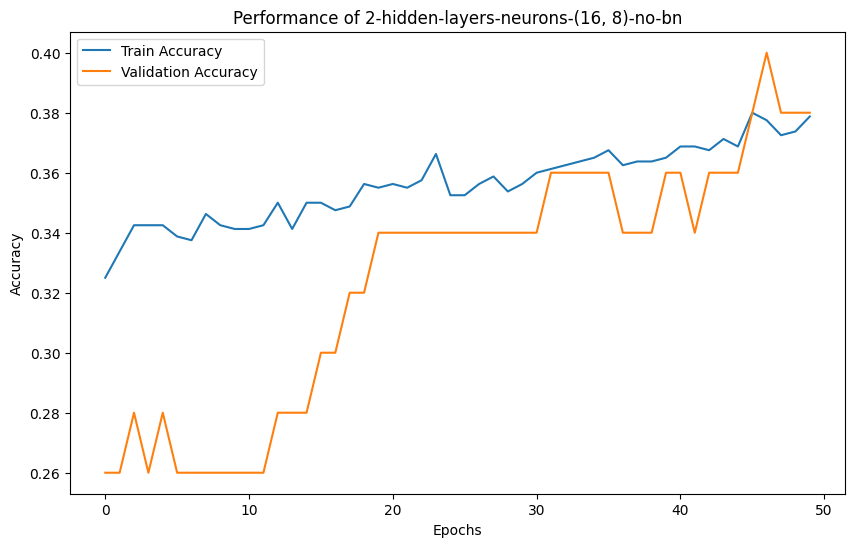

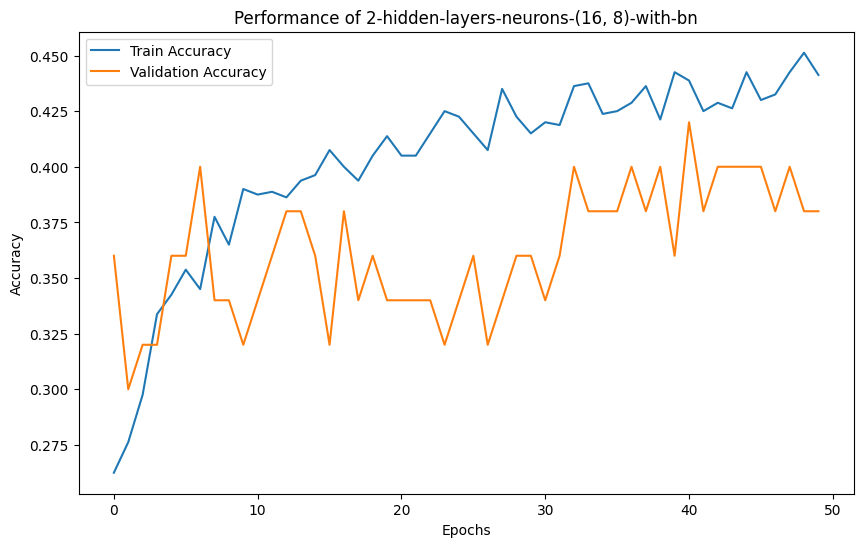

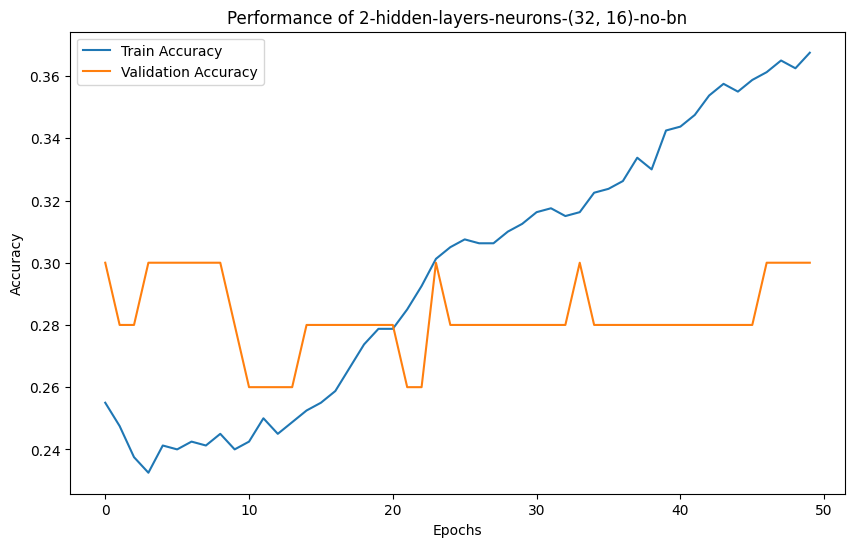

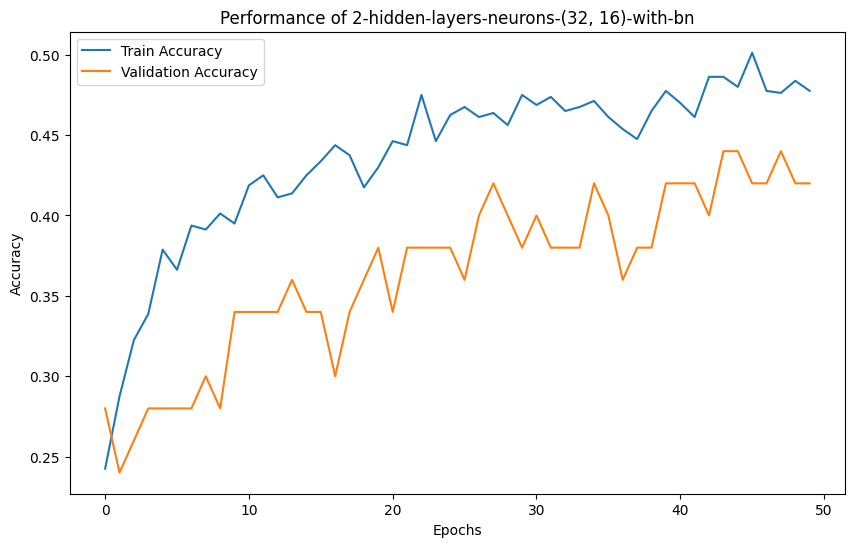

Full MLP Model Comparison:


,Model,Validation Accuracy
0,"2-hidden-layers-neurons-(32, 16)-with-bn",0.42
1,"2-hidden-layers-neurons-(16, 8)-no-bn",0.38
2,"2-hidden-layers-neurons-(16, 8)-with-bn",0.38
3,1-hidden-layer-neurons-16-with-bn,0.36
4,1-hidden-layer-neurons-16-no-bn,0.32
5,1-hidden-layer-neurons-32-with-bn,0.32
6,1-hidden-layer-neurons-32-no-bn,0.30
7,"2-hidden-layers-neurons-(32, 16)-no-bn",0.30



Top 3 Best Models:


,Model,Validation Accuracy
0,"2-hidden-layers-neurons-(32, 16)-with-bn",0.42
1,"2-hidden-layers-neurons-(16, 8)-no-bn",0.38
2,"2-hidden-layers-neurons-(16, 8)-with-bn",0.38


In [23]:
from tensorflow.keras.layers import BatchNormalization

# Model with one hidden layer and batch normalization
def create_model_one_hidden_layer_bn(neurons):
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),  # Batch normalization layer
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Model with two hidden layers and batch normalization
def create_model_two_hidden_layers_bn(neurons_1, neurons_2):
    model = Sequential([
        Dense(neurons_1, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),  # Batch normalization layer
        Dense(neurons_2, activation='relu'),
        BatchNormalization(),  # Batch normalization layer
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Compare models with and without batch normalization
results_bn = {}
configs = [
    {"type": "1-hidden-layer", "neurons": [16, 32]},
    {"type": "2-hidden-layers", "neurons": [(16, 8), (32, 16)]}
]

for config in configs:
    for neuron_config in config["neurons"]:
        if config["type"] == "1-hidden-layer":
            model = create_model_one_hidden_layer(neuron_config)
        else:
            model = create_model_two_hidden_layers(*neuron_config)

        history_no_bn = model.fit(
            X_train, y_train_adjusted,
            validation_data=(X_val, y_val_adjusted),
            epochs=50, batch_size=32, verbose=0
        )
        key_no_bn = f"{config['type']}-neurons-{neuron_config}-no-bn"
        results_bn[key_no_bn] = history_no_bn

        if config["type"] == "1-hidden-layer":
            model = create_model_one_hidden_layer_bn(neuron_config)
        else:
            model = create_model_two_hidden_layers_bn(*neuron_config)

        history_bn = model.fit(
            X_train, y_train_adjusted,
            validation_data=(X_val, y_val_adjusted),
            epochs=50, batch_size=32, verbose=0
        )
        key_bn = f"{config['type']}-neurons-{neuron_config}-with-bn"
        results_bn[key_bn] = history_bn

# Plot results for comparison
for key, history in results_bn.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Performance of {key}")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

import pandas as pd

comparison_results = []

for key, history in results_bn.items():
    final_val_accuracy = history.history["val_accuracy"][-1]  # Last epoch's validation accuracy
    comparison_results.append((key, final_val_accuracy))

comparison_results = sorted(comparison_results, key=lambda x: x[1], reverse=True)

top_3_models = comparison_results[:3]

comparison_df = pd.DataFrame(comparison_results, columns=["Model", "Validation Accuracy"])
top_3_df = pd.DataFrame(top_3_models, columns=["Model", "Validation Accuracy"])

from IPython.display import display

print("Full MLP Model Comparison:")
display(comparison_df)

print("\nTop 3 Best Models:")
display(top_3_df)

## Dropout

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


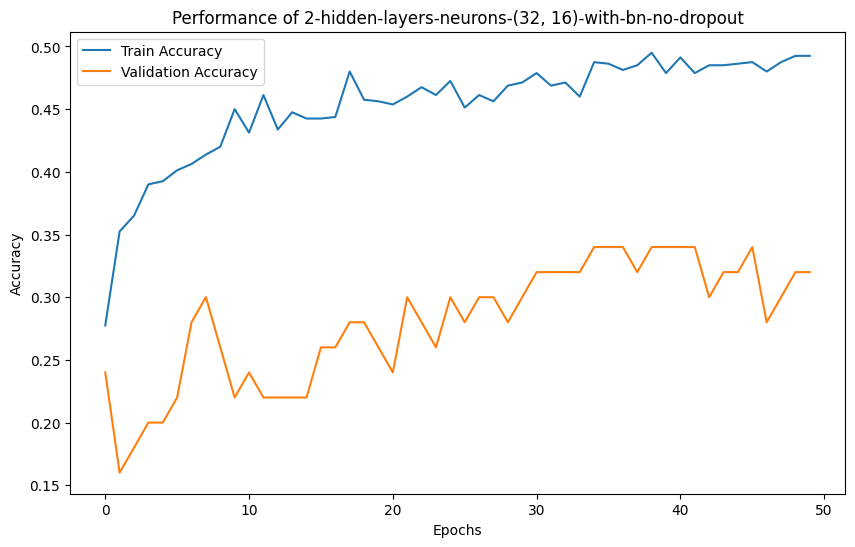

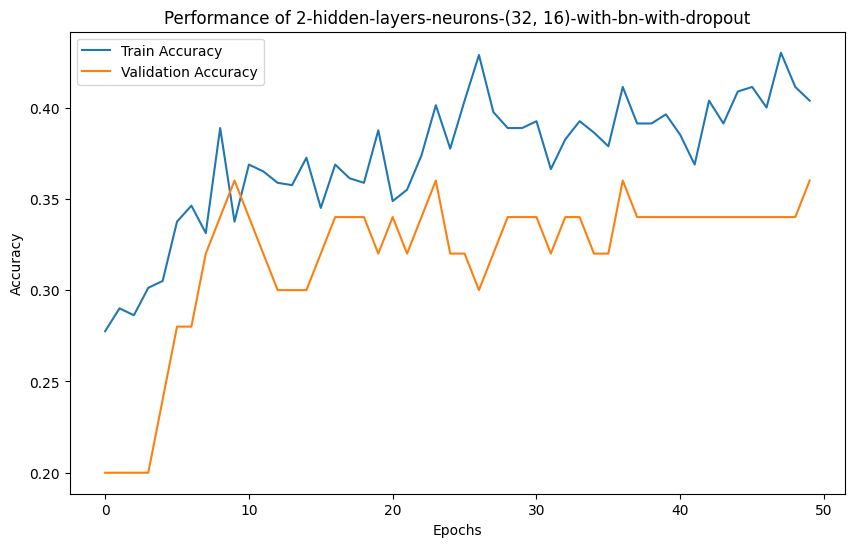

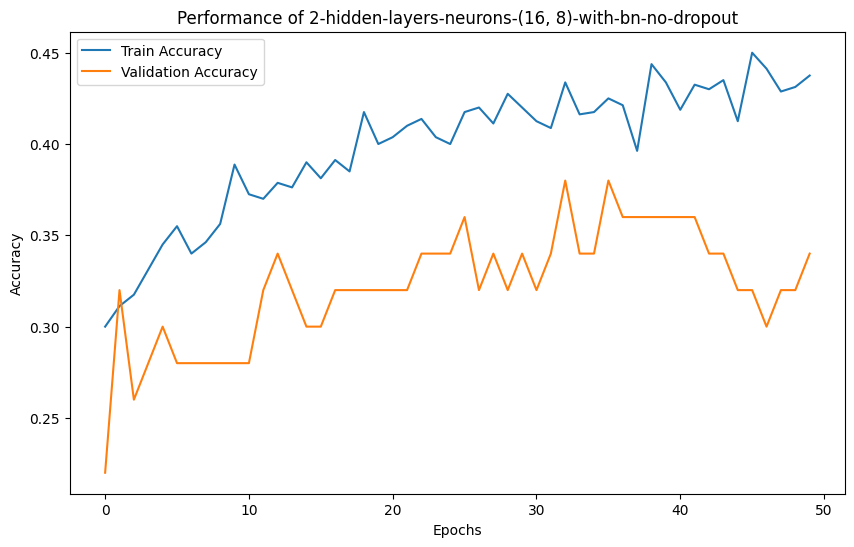

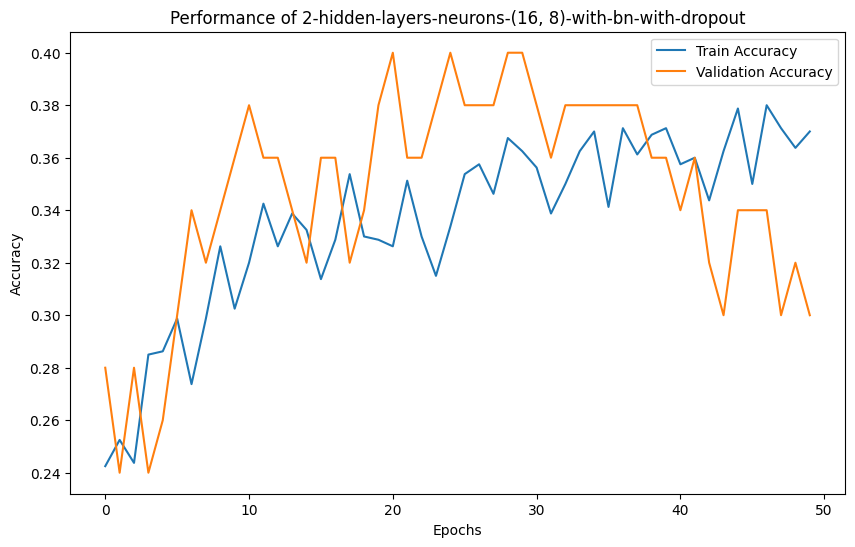

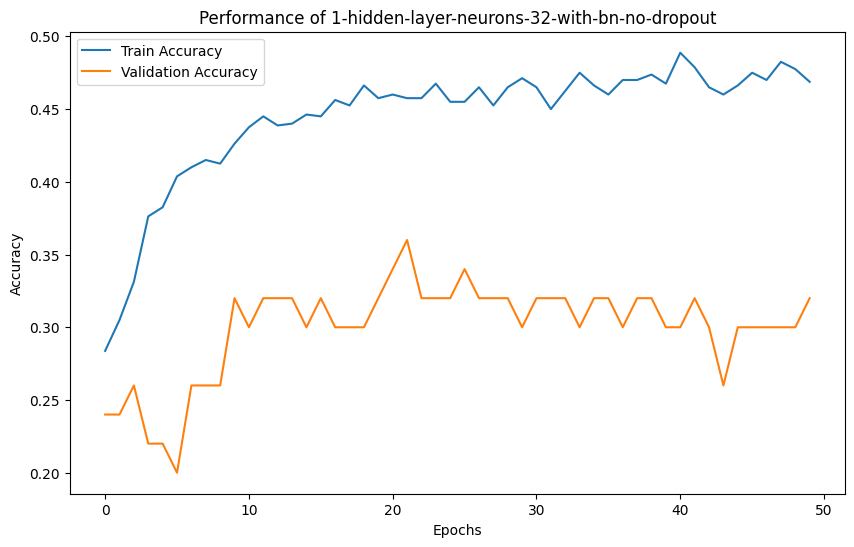

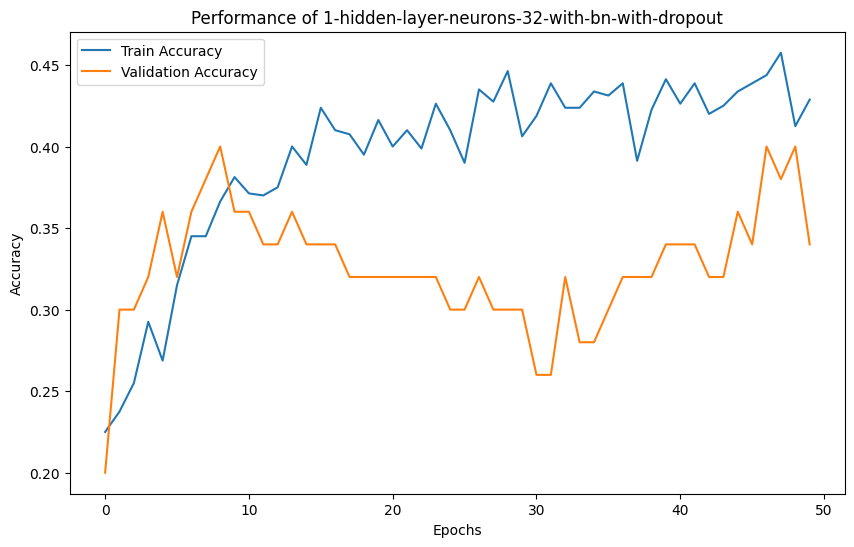

Dropout vs No Dropout Accuracy Comparison:


,Model,Validation Accuracy
0,"2-hidden-layers-neurons-(32, 16)-with-bn-with-...",0.36
1,"2-hidden-layers-neurons-(16, 8)-with-bn-no-dro...",0.34
2,1-hidden-layer-neurons-32-with-bn-with-dropout,0.34
3,"2-hidden-layers-neurons-(32, 16)-with-bn-no-dr...",0.32
4,1-hidden-layer-neurons-32-with-bn-no-dropout,0.32
5,"2-hidden-layers-neurons-(16, 8)-with-bn-with-d...",0.30


In [24]:
from tensorflow.keras.layers import Dropout

def create_model_with_dropout(model_type, neuron_config, dropout_rate=0.2):
    model = Sequential()

    model.add(Dense(neuron_config[0], activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout_rate))
    if "with-bn" in model_type:
        model.add(BatchNormalization())

    if len(neuron_config) > 1:
        for neurons in neuron_config[1:]:
            model.add(Dense(neurons, activation='relu'))
            model.add(Dropout(dropout_rate))
            if "with-bn" in model_type:
                model.add(BatchNormalization())

    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

dropout_results = {}
best_models = [
    {"type": "2-hidden-layers-neurons-(32, 16)-with-bn", "neurons": (32, 16)},
    {"type": "2-hidden-layers-neurons-(16, 8)-with-bn", "neurons": (16, 8)},
    {"type": "1-hidden-layer-neurons-32-with-bn", "neurons": (32,)}
]

for model_info in best_models:
    model_type = model_info["type"]
    neurons = model_info["neurons"]

    # Without Dropout (original model)
    if "with-bn" in model_type:
        model = create_model_with_dropout(model_type, neurons, dropout_rate=0.0)
    else:
        model = create_model_with_dropout(model_type, neurons, dropout_rate=0.0)

    history_no_dropout = model.fit(
        X_train, y_train_adjusted,
        validation_data=(X_val, y_val_adjusted),
        epochs=50, batch_size=32, verbose=0
    )
    dropout_results[f"{model_type}-no-dropout"] = history_no_dropout

    # With Dropout
    model_with_dropout = create_model_with_dropout(model_type, neurons, dropout_rate=0.2)
    history_with_dropout = model_with_dropout.fit(
        X_train, y_train_adjusted,
        validation_data=(X_val, y_val_adjusted),
        epochs=50, batch_size=32, verbose=0
    )
    dropout_results[f"{model_type}-with-dropout"] = history_with_dropout

# Plot the results
import matplotlib.pyplot as plt

for key, history in dropout_results.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Performance of {key}")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

dropout_comparison = []

for key, history in dropout_results.items():
    final_val_accuracy = history.history["val_accuracy"][-1]  # Last epoch's validation accuracy
    dropout_comparison.append((key, final_val_accuracy))

dropout_comparison = sorted(dropout_comparison, key=lambda x: x[1], reverse=True)

dropout_comparison_df = pd.DataFrame(dropout_comparison, columns=["Model", "Validation Accuracy"])

from IPython.display import display
print("Dropout vs No Dropout Accuracy Comparison:")
display(dropout_comparison_df)

## L2-Regularization

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


L2 Regularization Accuracy Comparison:


,Model,Validation Accuracy
0,"2-hidden-layers-neurons-(32, 16)-with-bn",0.38
1,1-hidden-layer-neurons-32-with-bn,0.34
2,"2-hidden-layers-neurons-(16, 8)-with-bn",0.32


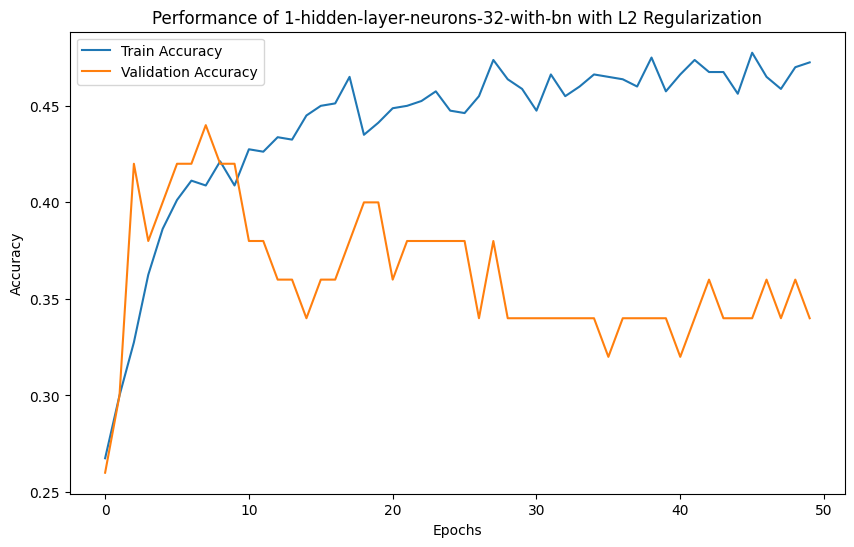

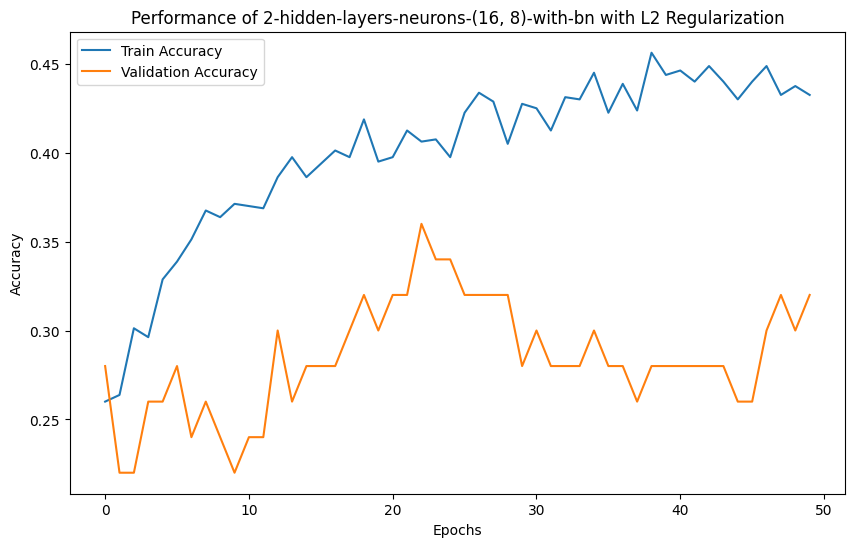

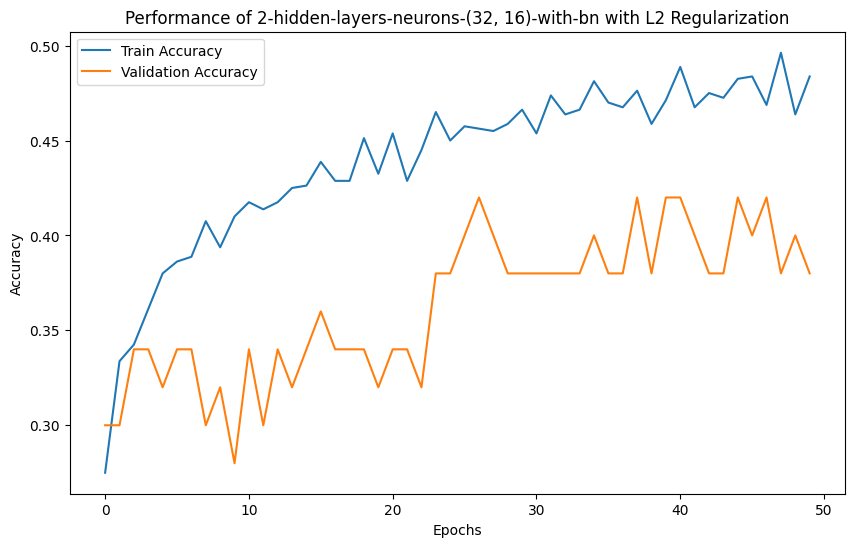

In [32]:
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

def create_model_with_l2_regularization(model_type, neuron_config, l2_rate=0.00010, dropout_rate=0.0):
    model = Sequential()

    model.add(Dense(neuron_config[0], activation='relu', kernel_regularizer=l2(l2_rate), input_shape=(X_train.shape[1],)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    if "with-bn" in model_type:
        model.add(BatchNormalization())

    if len(neuron_config) > 1:
        for neurons in neuron_config[1:]:
            model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(l2_rate)))
            if dropout_rate > 0:
                model.add(Dropout(dropout_rate))
            if "with-bn" in model_type:
                model.add(BatchNormalization())

    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

l2_results = {}
top_models = [
    {"type": "1-hidden-layer-neurons-32-with-bn", "neurons": [32], "dropout_rate": 0.0},
    {"type": "2-hidden-layers-neurons-(16, 8)-with-bn", "neurons": [16, 8], "dropout_rate": 0.0},
    {"type": "2-hidden-layers-neurons-(32, 16)-with-bn", "neurons": [32, 16], "dropout_rate": 0.0}
]

for model_info in top_models:
    model_type = model_info["type"]
    neurons = model_info["neurons"]
    dropout_rate = model_info["dropout_rate"]

    # Model with L2 regularization
    model = create_model_with_l2_regularization(model_type, neurons, l2_rate=0.00010, dropout_rate=dropout_rate)
    history = model.fit(
        X_train, y_train_adjusted,
        validation_data=(X_val, y_val_adjusted),
        epochs=50, batch_size=32, verbose=0
    )
    l2_results[model_type] = history

l2_comparison = []

for key, history in l2_results.items():
    final_val_accuracy = history.history["val_accuracy"][-1]  # Last epoch's validation accuracy
    l2_comparison.append((key, final_val_accuracy))

l2_comparison = sorted(l2_comparison, key=lambda x: x[1], reverse=True)

l2_comparison_df = pd.DataFrame(l2_comparison, columns=["Model", "Validation Accuracy"])

print("L2 Regularization Accuracy Comparison:")
display(l2_comparison_df)

for key, history in l2_results.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Performance of {key} with L2 Regularization")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

## Adam

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Adam Optimizer Accuracy Comparison:


,Model,Validation Accuracy
0,1-hidden-layer-neurons-32-with-bn-Adam,0.38
1,"2-hidden-layers-neurons-(32, 16)-with-bn-Adam",0.38
2,"2-hidden-layers-neurons-(16, 8)-with-bn-Adam",0.20


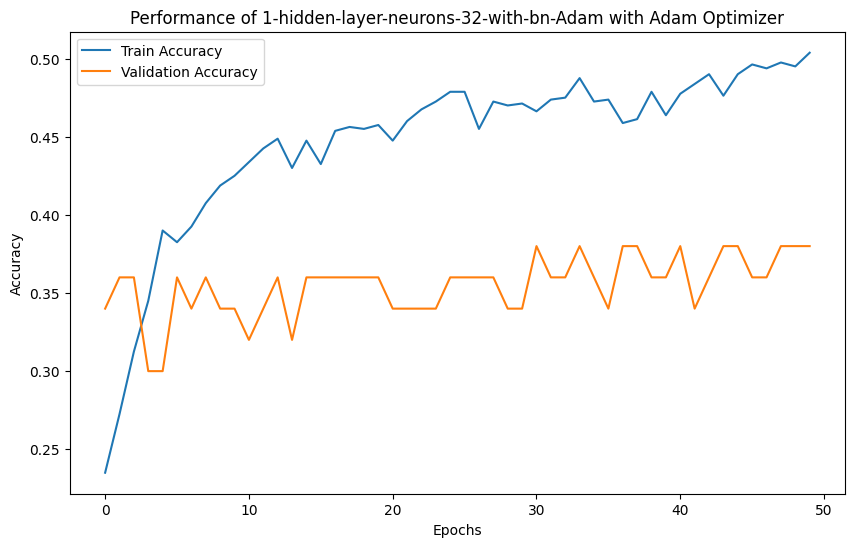

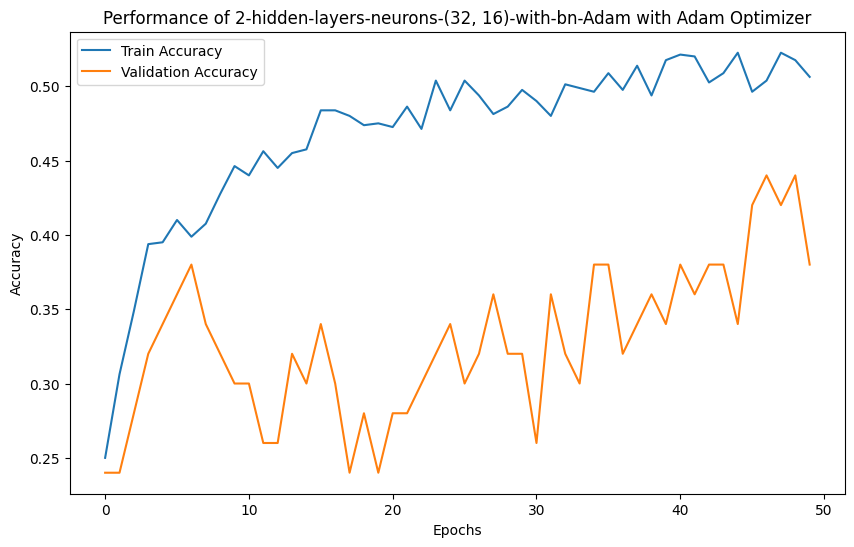

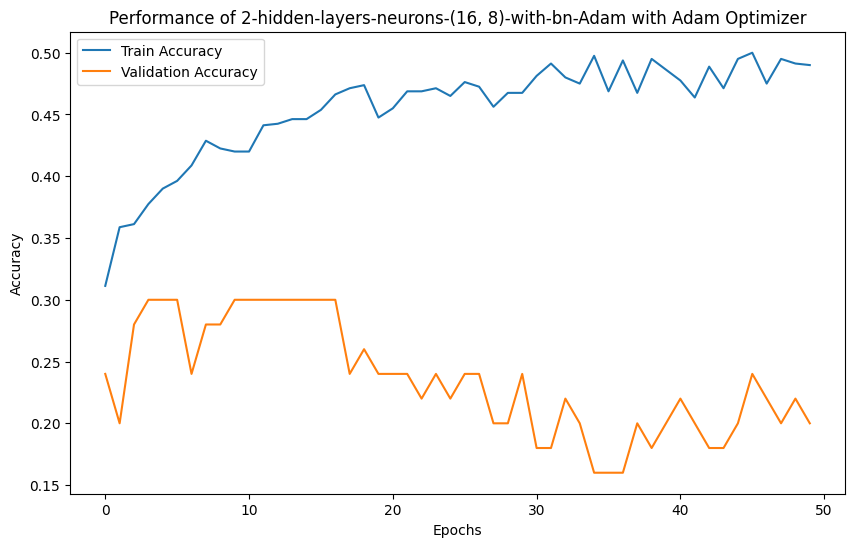

In [38]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

def create_model_with_optimizer(model_type, neuron_config, optimizer, l2_rate=0.00010, dropout_rate=0.0):
    model = Sequential()

    model.add(Dense(neuron_config[0], activation='relu', kernel_regularizer=l2(l2_rate), input_shape=(X_train.shape[1],)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    if "with-bn" in model_type:
        model.add(BatchNormalization())

    if len(neuron_config) > 1:
        for neurons in neuron_config[1:]:
            model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(l2_rate)))
            if dropout_rate > 0:
                model.add(Dropout(dropout_rate))
            if "with-bn" in model_type:
                model.add(BatchNormalization())

    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

optimizer_results = {}
top_models = [
    {"type": "1-hidden-layer-neurons-32-with-bn", "neurons": (32,), "dropout_rate": 0.0},
    {"type": "2-hidden-layers-neurons-(32, 16)-with-bn", "neurons": (32, 16), "dropout_rate": 0.0},
    {"type": "2-hidden-layers-neurons-(16, 8)-with-bn", "neurons": (16, 8), "dropout_rate": 0.0}
]

for model_info in top_models:
    model_type = model_info["type"]
    neurons = model_info["neurons"]
    dropout_rate = model_info["dropout_rate"]

    optimizer = Adam()  # Instantiate Adam optimizer

    model = create_model_with_optimizer(model_type, neurons, optimizer, l2_rate=0.00010, dropout_rate=dropout_rate)
    history = model.fit(
        X_train, y_train_adjusted,
        validation_data=(X_val, y_val_adjusted),
        epochs=50, batch_size=32, verbose=0
    )
    key = f"{model_type}-Adam"
    optimizer_results[key] = history

optimizer_comparison = []

for key, history in optimizer_results.items():
    final_val_accuracy = history.history["val_accuracy"][-1]  # Last epoch's validation accuracy
    optimizer_comparison.append((key, final_val_accuracy))

optimizer_comparison = sorted(optimizer_comparison, key=lambda x: x[1], reverse=True)

optimizer_comparison_df = pd.DataFrame(optimizer_comparison, columns=["Model", "Validation Accuracy"])

print("Adam Optimizer Accuracy Comparison:")
display(optimizer_comparison_df)

for key, history in optimizer_results.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Performance of {key} with Adam Optimizer")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()


## Using Test data

In [44]:
import numpy as np
import pandas as pd

# Define the desired models
desired_models = [
    "1-hidden-layer-neurons-32-with-bn-Adam",
    "2-hidden-layers-neurons-(32, 16)-with-bn",
    "2-hidden-layers-neurons-(32, 16)-with-bn-Adam",
]

# Randomly select 10 samples from the test data
random_indices = np.random.choice(X_test.shape[0], size=10, replace=False)
X_test_samples = X_test[random_indices]
y_test_samples = np.array(y_test_adjusted)[random_indices]  # Adjusted test labels

# Function to evaluate a model on the test samples
def evaluate_model_on_samples(model, X_samples):
    predictions = model.predict(X_samples)
    predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class indices
    return predicted_labels

# Dictionary linking desired models to their pretrained counterparts
# Assumes these models are already trained and loaded
pretrained_models = {
    "1-hidden-layer-neurons-32-with-bn-Adam": create_model_one_hidden_layer_bn(32),
    "2-hidden-layers-neurons-(32, 16)-with-bn": create_model_two_hidden_layers_bn(32, 16),
    "2-hidden-layers-neurons-(32, 16)-with-bn-Adam": create_model_two_hidden_layers_bn(32, 16),
}

# Evaluate each model on the selected test samples
results = {}
for model_name, model in pretrained_models.items():
    predicted_labels = evaluate_model_on_samples(model, X_test_samples)
    results[model_name] = predicted_labels

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({
    "Sample Index": random_indices,
    "Actual Value": y_test_samples
})

# Add predictions from each model to the DataFrame
for model_name, predictions in results.items():
    comparison_df[model_name] = predictions

# Display the results
print("Predictions vs Actual Values for Randomly Selected Test Samples:")
display(comparison_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predictions vs Actual Values for Randomly Selected Test Samples:


,Sample Index,Actual Value,1-hidden-layer-neurons-32-with-bn-Adam,"2-hidden-layers-neurons-(32, 16)-with-bn","2-hidden-layers-neurons-(32, 16)-with-bn-Adam"
0,30,0,1,0,2
1,126,1,1,0,3
2,108,1,2,0,1
3,47,0,1,0,3
4,45,1,1,0,3
5,54,3,1,0,3
6,43,2,2,0,3
7,144,3,2,0,0
8,32,1,2,0,2
9,10,1,1,0,3


## Combination of two models

In [54]:
import numpy as np
import pandas as pd

# Define the specific indices and actual values
specific_indices = [30, 126, 108, 47, 45, 54, 43, 144, 32, 10]
actual_values = [0, 1, 1, 0, 1, 3, 2, 3, 1, 1]

# Get the test samples and their corresponding actual values
X_specific_samples = X_test[specific_indices]
y_specific_actual = np.array(actual_values)

# Pretrained models
model_1 = pretrained_models["1-hidden-layer-neurons-32-with-bn-Adam"]
model_2 = pretrained_models["2-hidden-layers-neurons-(32, 16)-with-bn-Adam"]

# Get predictions from both models
predictions_model_1 = model_1.predict(X_specific_samples)
predictions_model_2 = model_2.predict(X_specific_samples)

# Combine predictions (e.g., by averaging probabilities)
combined_predictions = (predictions_model_1 + predictions_model_2) / 2

# Convert combined probabilities to class labels
combined_labels = np.argmax(combined_predictions, axis=1)

# Create a DataFrame to display results
results_df = pd.DataFrame({
    "Index": specific_indices,
    "Actual Value": y_specific_actual,
    "Model 1 Prediction": np.argmax(predictions_model_1, axis=1),
    "Model 2 Prediction": np.argmax(predictions_model_2, axis=1),
    "Combined Prediction": combined_labels
})

# Display the results
print("Predictions for Specific Indices:")
display(results_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predictions for Specific Indices:


,Index,Actual Value,Model 1 Prediction,Model 2 Prediction,Combined Prediction
0,30,0,1,2,2
1,126,1,1,3,1
2,108,1,2,1,2
3,47,0,1,3,1
4,45,1,1,3,1
5,54,3,1,3,1
6,43,2,2,3,1
7,144,3,2,0,2
8,32,1,2,2,2
9,10,1,1,3,1
